In [42]:
%load_ext watermark
%watermark

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
2019-04-06T00:28:19-06:00

CPython 3.7.3rc1
IPython 7.3.0

compiler   : MSC v.1916 64 bit (AMD64)
system     : Windows
release    : 10
machine    : AMD64
processor  : Intel64 Family 6 Model 142 Stepping 9, GenuineIntel
CPU cores  : 4
interpreter: 64bit


In [43]:
%matplotlib inline
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from sklearn import datasets

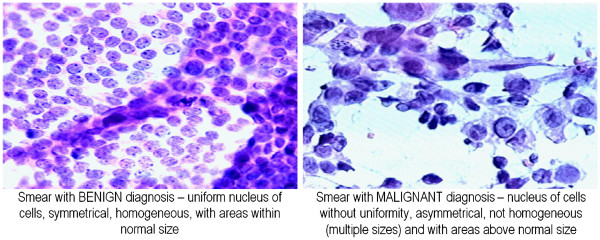

In [44]:
from IPython.display import Image

Image("D:/datasets/Curso_Mauel_Garrido/media/breast_cancer.jpeg")

In [45]:
cancer_datos = datasets.load_breast_cancer()

cancer_df = pd.DataFrame(cancer_datos["data"], columns=cancer_datos["feature_names"])

cancer_df["objetivo"] = cancer_datos.target
cancer_df["objetivo"] = cancer_df["objetivo"].replace({0:1, 1:0})

In [46]:
cancer_df["objetivo"].value_counts(True)

0    0.627417
1    0.372583
Name: objetivo, dtype: float64

In [47]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,objetivo
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


En primer lugar creamos un modelo simple de Regresión Logística.

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [49]:
X = cancer_df[cancer_datos.feature_names]
y = cancer_df["objetivo"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [50]:
modelo = LogisticRegression()

modelo.fit(X_train, y_train)

predicciones = modelo.predict(X_test)
clases_reales = y_test
predicciones_probabilidades = modelo.predict_proba(X_test)

c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [51]:
def tupla_clase_prediccion(y_real, y_pred):
    return list(zip(y_real, y_pred))

tupla_clase_prediccion(clases_reales, predicciones)[:10]

[(0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0)]

**Conceptos de Clasificación binaria**

En clasificación binaria, tenemos el concepto de casos negativos (clase 0, en el caso del dataset de cancer de mama serian los casos donde el cancer es benigno) y casos positivos (clase 1, en el caso del dataset de cancer de mama serían los casos donde el cancer es maligno). Positivo y negativo no significa que el resultado sea bueno o malo, simplemente que la detección de un cancer maligno se active o no.

- Casos positivos: Casos donde la clase es 1 (cánceres malignos)
- Casos negativos: Casos donde la clase es 0 (cánceres benignos)

Esto nos lleva a computar 4 tipos de observaciones, explicados como ejemplos del dataset del cancer de mama.

- Verdaderos Positivos(True positives), serían las imágenes con un cancer maligno que se detectan como cancer maligno.
- Falsos Positivos (False positives), serían los cánceres benignos que se detectan como un cancer maligno.
- Verdaderos Negativos(True Negatives), serían los canceres benignos que se clasifican como cánceres benignos.
- Falsos Negativos(False Negatives), serían los canceres malignos que se clasifican como cánceres benignos.

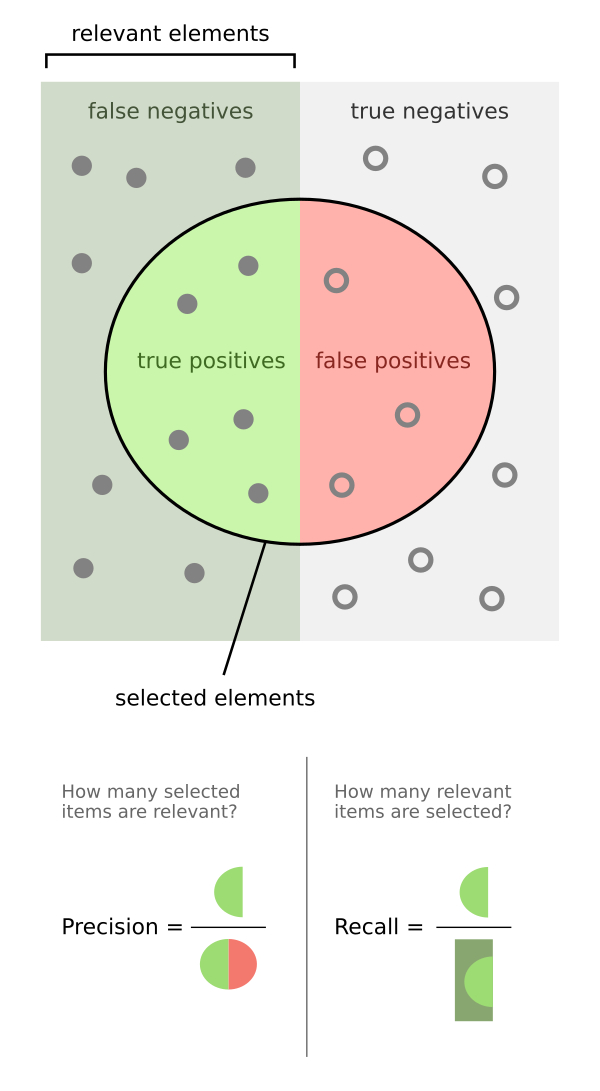

In [52]:
Image("D:/datasets/Curso_Mauel_Garrido/media/Precisionrecall.jpg", height = 300, width = 400)

In [53]:
def VP(clases_reales, predicciones):
    par_clase_prediccion = tupla_clase_prediccion(clases_reales, predicciones)
    return len([obs for obs in par_clase_prediccion if obs[0] == 1 and obs[1] == 1])

def VN(clases_reales, predicciones):
    par_clase_prediccion = tupla_clase_prediccion(clases_reales, predicciones)
    return len([obs for obs in par_clase_prediccion if obs[0] == 0 and obs[1] == 0])
    
def FP(clases_reales, predicciones):
    par_clase_prediccion = tupla_clase_prediccion(clases_reales, predicciones)
    return len([obs for obs in par_clase_prediccion if obs[0] == 0 and obs[1] == 1])

def FN(clases_reales, predicciones):
    par_clase_prediccion = tupla_clase_prediccion(clases_reales, predicciones)
    return len([obs for obs in par_clase_prediccion if obs[0] == 1 and obs[1] == 0])


print("""
Verdaderos Positivos: {}
Verdaderos Negativos: {}
Falsos Positivos: {}
Falsos Negativos: {}
""".format(
    VP(clases_reales, predicciones),
    VN(clases_reales, predicciones),
    FP(clases_reales, predicciones),
    FN(clases_reales, predicciones)    
))    


Verdaderos Positivos: 59
Verdaderos Negativos: 106
Falsos Positivos: 2
Falsos Negativos: 4



### Ratios de clasificación

**Exactitud (Accuracy)**

La exactitud es una medida general de como se comporta el modelo, mide simplemente el porcentaje de casos que se han clasificado correctamente.

$$Exactitud=\frac{Número~de~observaciones~correctamente~clasificadas}{Número~de~observaciones~totales}= \frac{VP+VN}{VP+VN+FP+FN}$$

In [54]:
def exactitud(clases_reales, predicciones):
    vp = VP(clases_reales, predicciones)
    vn = VN(clases_reales, predicciones)
    return (vp+vn) / len(clases_reales)

exactitud(clases_reales, predicciones)

0.9649122807017544

In [55]:
from sklearn import metrics
metrics.accuracy_score(clases_reales, predicciones)

0.9649122807017544

**Precisión (Precission)**

La precisión indica la habilidad del modelo para clasificar como positivos los casos que son positivos.

$$Precisión=\frac{Número~de~observaciones~positivas~correctamente~clasificadas}{Número~de~observaciones~clasificadas~como~positivas}= \frac{VP}{VP+FP}$$

In [56]:
def precision(clases_reales, predicciones):
    vp = VP(clases_reales, predicciones)
    fp = FP(clases_reales, predicciones)
    return vp / (vp + fp)

precision(clases_reales, predicciones)

0.9672131147540983

In [57]:
metrics.average_precision_score(clases_reales, predicciones)

0.9291945711272717

**Exhaustividad o sensibilidad(Recall o True Positive Rate)**

La sensibilidad nos da una medida de la habilidad del modelo para encontrar todos los casos positivos. La sensibilidad se mide en función de una clase.

$$Sensibilidad=\frac{Número~de~observaciones~positivas~clasificadas~como~positivas}{Número~de~observaciones~positivas~totales}= \frac{VP}{VP+FN}$$

In [58]:
def sensibilidad(clases_reales, predicciones):
    vp = VP(clases_reales, predicciones)
    fn = FN(clases_reales, predicciones)
    return vp / (vp + fn)

sensibilidad(clases_reales, predicciones)

0.9365079365079365

In [59]:
metrics.recall_score(clases_reales, predicciones)

0.9365079365079365

**Matriz de confusion**

La matriz de confusión es una forma muy sencilla de comparar como ha clasificado cada observación el modelo.

In [60]:
from sklearn.metrics import confusion_matrix
confusion_matrix(clases_reales, predicciones)

array([[106,   2],
       [  4,  59]], dtype=int64)

**Puntuación F1 (F1 score)**

La puntuación F1 es una media ponderada entre la sensibilidad (que intenta obtener cuantos mas verdaderos positivos independientemente de los falsos positivos) y la precisión (que intenta obtener solo verdaderos positivos que sean casos claros para limitar los falsos positivos).

La puntuación F1 se define como la media harmónica de la precisión y la sensibilidad:

$$F1=2*\frac{1}{\frac{1}{precisión}+\frac{1}{sensibilidad}}=2*\frac{precisión*sensibilidad}{precisión+sensibilidad}$$

In [61]:
def puntuacion_f1(clases_reales, predicciones):
    precision_preds = precision(clases_reales, predicciones)
    sensibilidad_preds = sensibilidad(clases_reales, predicciones)
    return 2*(precision_preds*sensibilidad_preds)/(precision_preds+sensibilidad_preds)

puntuacion_f1(clases_reales, predicciones)

0.9516129032258064

In [62]:
metrics.f1_score(clases_reales, predicciones)

0.9516129032258064

**Ratio de Falsos Positivos (Ratio de Falsa Alarma o FPR)**

El ratio de falsos positivos nos da una medida de las probabilidades de nuestro modelo de asignar una clase positiva a un caso negativo.

Se define como:

$$FPR=\frac{Número~de~observaciones~negativas~clasificadas~como~positivas}{Número~de~observaciones~negativas}= \frac{FP}{FP+TN}$$

In [63]:
def fpr(clases_reales, predicciones):
    return (FP(clases_reales, predicciones) / (
             FP(clases_reales, predicciones) + VN(clases_reales, predicciones)
             )
           )
fpr(clases_reales, predicciones)

0.018518518518518517

**¿Cómo clasifica un modelo?**

Un modelo como la regresión lineal funciona prediciendo distancias a una "linea de decision" que se convierten en probabilidades para cada clase. Pero a la hora de la verdad al modelo le suele interesar sólo saber que clase predice el modelo. En general esto se hace decidiendo un umbral *(threshold)* y clasificando los casos con menor probabilidad como clase negativa y  mayor probabilidad como clase positiva.

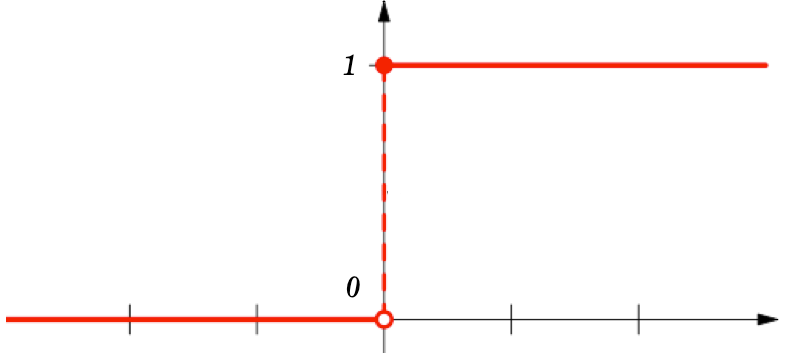

In [64]:
Image("D:/datasets/Curso_Mauel_Garrido/media/threshold.png")

In [69]:
df = pd.DataFrame({"clase_real":clases_reales,
                   "clase_pred": predicciones,
                   "probabilidades_0":modelo.predict_proba(X_test)[:,0],
                    "probabilidades_1":modelo.predict_proba(X_test)[:,1],
                  })
df["sum_probas"] = df.probabilidades_0 + df.probabilidades_1

In [70]:
df.sample(10)

,clase_real,clase_pred,probabilidades_0,probabilidades_1,sum_probas
425,0,0,9.929951e-01,0.007005,1.0
449,1,1,1.441468e-09,1.000000,1.0
70,1,1,4.179428e-09,1.000000,1.0
83,1,1,1.968248e-03,0.998032,1.0
298,0,0,8.365551e-01,0.163445,1.0
422,0,0,9.974524e-01,0.002548,1.0
532,0,0,9.773624e-01,0.022638,1.0
145,0,0,9.975431e-01,0.002457,1.0
290,0,1,2.537187e-01,0.746281,1.0
384,0,0,9.961476e-01,0.003852,1.0


Como el modelo no tiene ningún motivo para elegir un umbral determinado (sólo sabe probabilidades) elige 0.5 por defecto.

In [71]:
df.query("probabilidades_1 > 0.5 & clase_pred == 0")

,clase_real,clase_pred,probabilidades_0,probabilidades_1,sum_probas


In [72]:
df.query("probabilidades_0 > 0.5 & clase_pred == 1")

,clase_real,clase_pred,probabilidades_0,probabilidades_1,sum_probas


**Curva Precisión (Precission-Recall Curve)**

In [75]:
def probabilidades_a_clases(predicciones_probabilidades, umbral = 0.5):
    predicciones = np.zeros([len(predicciones_probabilidades), ])
    predicciones[predicciones_probabilidades[:,1] >= umbral] = 1
    return predicciones

In [76]:
predicciones_probabilidades[:10]

array([[8.15732927e-01, 1.84267073e-01],
       [4.17942814e-09, 9.99999996e-01],
       [2.28475758e-03, 9.97715242e-01],
       [9.96493206e-01, 3.50679432e-03],
       [9.99045687e-01, 9.54312894e-04],
       [4.78929119e-10, 1.00000000e+00],
       [9.18154441e-13, 1.00000000e+00],
       [1.09821776e-02, 9.89017822e-01],
       [9.96625757e-01, 3.37424306e-03],
       [9.85582372e-01, 1.44176278e-02]])

In [77]:
probabilidades_a_clases(predicciones_probabilidades, umbral = 0.90)[:10]

array([0., 1., 1., 0., 0., 1., 1., 1., 0., 0.])

In [79]:
from ipywidgets import widgets, fixed, interact
@interact(umbral = widgets.FloatSlider(min = 0.01, max = 0.99, step = 0.01, value = 0.01))
def evaluar_umbral(umbral):
    predicciones_en_umbral = probabilidades_a_clases(predicciones_probabilidades, umbral)
    sensibilidad_umbral = metrics.recall_score(clases_reales, predicciones_en_umbral)
    fpr_umbral = fpr(clases_reales, predicciones_en_umbral)
    precision_umbral = precision(clases_reales, predicciones_en_umbral) 
    print( """
    Precision: {:.3f}
    Sensibilidad:{:.3f}
    Ratio de Alarma: {:.3f}
    """.format(
        precision_umbral,
        sensibilidad_umbral,
        fpr_umbral
    ))

interactive(children=(FloatSlider(value=0.01, description='umbral', max=0.99, min=0.01, step=0.01), Output()),…

In [80]:
def evaluar_umbral(umbral):
    predicciones_en_umbral = probabilidades_a_clases(predicciones_probabilidades, umbral)
    precision_umbral = precision(clases_reales, predicciones_en_umbral)
    sensibilidad_umbral = metrics.recall_score(clases_reales, predicciones_en_umbral)
    fpr_umbral = fpr(clases_reales, predicciones_en_umbral)
    return precision_umbral, sensibilidad_umbral, fpr_umbral


rango_umbral = np.linspace(0., 1., 1000)
sensibilidad_umbrales = []
precision_umbrales = []
fpr_umbrales = []

for umbral in rango_umbral:
    precision_umbral, sensibilidad_umbral, fpr_umbral = evaluar_umbral(umbral)
    precision_umbrales.append(precision_umbral)
    sensibilidad_umbrales.append(sensibilidad_umbral)
    fpr_umbrales.append(fpr_umbral)

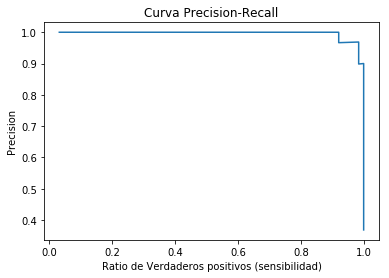

In [81]:
plt.plot(sensibilidad_umbrales, precision_umbrales);
plt.ylabel("Precision")
plt.xlabel("Ratio de Verdaderos positivos (sensibilidad)")
plt.title("Curva Precision-Recall");

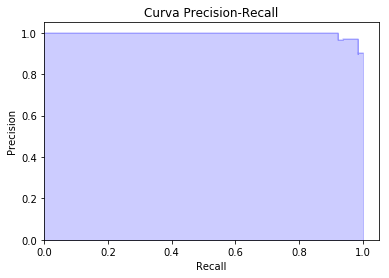

In [83]:
def grafica_precision_recall(clases_reales, predicciones_probabilidades):
    precision_, recall_, _ = metrics.precision_recall_curve(
        clases_reales, predicciones_probabilidades[:,1])

    plt.step(recall_, precision_, color = 'b', alpha = 0.2,
         where = 'post')
    plt.fill_between(recall_, precision_, step = 'post', alpha = 0.2,
                 color = 'b')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.05])
    plt.title('Curva Precision-Recall');
    plt.show()


grafica_precision_recall(clases_reales, predicciones_probabilidades)

**Area bajo la curva (Area Under the Curve, ROC-AUC)**

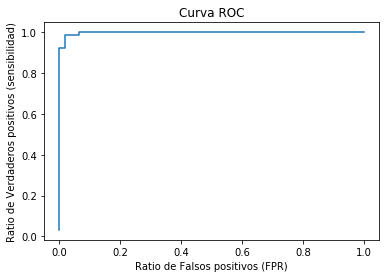

In [84]:
plt.plot(fpr_umbrales, sensibilidad_umbrales);
plt.xlabel("Ratio de Falsos positivos (FPR)")
plt.ylabel("Ratio de Verdaderos positivos (sensibilidad)")
plt.title("Curva ROC");

In [85]:
metrics.roc_auc_score(clases_reales, predicciones)

0.958994708994709

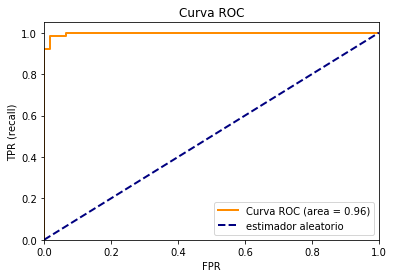

In [86]:
def grafica_curva_auc(clases_reales, predicciones, predicciones_probabilidades):
    fpr, tpr, _ = metrics.roc_curve(clases_reales, predicciones_probabilidades[:,1])
    roc_auc = metrics.roc_auc_score(clases_reales, predicciones)
    plt.figure()

    plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='Curva ROC (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="estimador aleatorio")
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('FPR')
    plt.ylabel('TPR (recall)')
    plt.title('Curva ROC')
    plt.legend(loc="lower right")
    plt.show();

grafica_curva_auc(clases_reales, predicciones, predicciones_probabilidades)

In [87]:
def evaluar_modelo(clases_reales, predicciones, probabilidades):
    exactitud = metrics.accuracy_score(clases_reales, predicciones)
    precision = metrics.average_precision_score(clases_reales, predicciones)
    sensibilidad = metrics.recall_score(clases_reales, predicciones)
    roc_auc = metrics.roc_auc_score(clases_reales, predicciones)
    f1 = metrics.f1_score(clases_reales, predicciones)
    print("""
    Exactitud: {:.3f}
    Precisión: {:.3f}
    Sensibilidad: {:.3f}
    Area bajo curva (AUC): {:.3f}
    Puntuación F1: {:.3f}
    """.format(
        exactitud, 
        precision,
        sensibilidad,
        roc_auc,
        f1
    ))
    
evaluar_modelo(clases_reales, predicciones, predicciones_probabilidades)


    Exactitud: 0.965
    Precisión: 0.929
    Sensibilidad: 0.937
    Area bajo curva (AUC): 0.959
    Puntuación F1: 0.952
    


<hr>
<hr>
<hr>

In [39]:
cancer_df.objetivo.value_counts(True)

0    0.627417
1    0.372583
Name: objetivo, dtype: float64

# Evaluación en Dataset imbalanceado

Ahora vamos a usar un dataset con clases no balanceadas

https://www.kaggle.com/c/GiveMeSomeCredit/data


>Improve on the state of the art in credit scoring by predicting the probability that somebody will experience financial distress in the next two years. 

In [88]:
creditos_df = pd.read_csv("D:/datasets/Curso_Mauel_Garrido/datos_creditos.csv")

In [89]:
creditos_df.head()

,impago_en_2_anos,deuda_credito,edad,n_veces_pagos_retrasados_30_59_dias,ratio_deuda_mensual_salario,salario,n_lineas_credito_y_prestamos,n_veces_pagos_retrasados_90_dias,n_hipotecas,n_veces_pagos_retrasados_60_89_dias,numero_personas_dependientes
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [90]:
variable_objetivo = "impago_en_2_anos"

In [91]:
X = creditos_df.drop(variable_objetivo, axis=1)
y = creditos_df[variable_objetivo]

X_train_credito, X_test_credito, y_train_credito, y_test_credito = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [92]:
y.value_counts(normalize=True)

0    0.93316
1    0.06684
Name: impago_en_2_anos, dtype: float64

In [93]:
modelo = LogisticRegression()

modelo.fit(X_train_credito, y_train_credito)

predicciones_creditos = modelo.predict(X_test_credito)
clases_reales_creditos = y_test_credito
predicciones_probabilidades_creditos = modelo.predict_proba(X_test_credito)

c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [94]:
evaluar_modelo(clases_reales_creditos, predicciones_creditos, predicciones_probabilidades_creditos)


    Exactitud: 0.934
    Precisión: 0.083
    Sensibilidad: 0.035
    Area bajo curva (AUC): 0.516
    Puntuación F1: 0.065
    


In [96]:
len(creditos_df[creditos_df[variable_objetivo] == 1])

10026

In [97]:
len([pred for pred in predicciones if pred == 1])

61

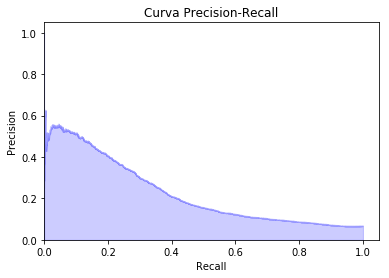

In [98]:
grafica_precision_recall(clases_reales_creditos, predicciones_probabilidades_creditos)

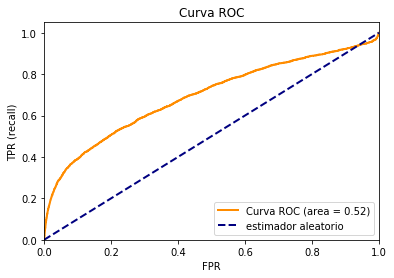

In [99]:
grafica_curva_auc(clases_reales_creditos, predicciones_creditos, predicciones_probabilidades_creditos)



## Como decidir un Umbral de decision

In [100]:
import pandas as pd
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

cancer_datos = datasets.load_breast_cancer()

cancer_df = pd.DataFrame(cancer_datos["data"],
                           columns=cancer_datos["feature_names"]
                          )

cancer_df["objetivo"] = cancer_datos.target
cancer_df["objetivo"] = cancer_df["objetivo"].replace({0:1, 1:0})

In [101]:
X = cancer_df[cancer_datos.feature_names]
y = cancer_df["objetivo"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [102]:
modelo = LogisticRegression()

modelo.fit(X_train, y_train)

predicciones = modelo.predict(X_test)
clases_reales = y_test
predicciones_probabilidades = modelo.predict_proba(X_test)

c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [103]:
probas = modelo.predict_proba(X_test)[:5]
probas

array([[8.15732927e-01, 1.84267073e-01],
       [4.17942814e-09, 9.99999996e-01],
       [2.28475758e-03, 9.97715242e-01],
       [9.96493206e-01, 3.50679432e-03],
       [9.99045687e-01, 9.54312894e-04]])

In [104]:
umbral_decision = 0.5

probas[:,1] >= umbral_decision

array([False,  True,  True, False, False])

In [105]:
umbral_decision = 0.1

probas[:,1]>=umbral_decision

array([ True,  True,  True, False, False])

In [106]:
def softmax(coste_fp, coste_fn):
    return np.exp(coste_fp) / (np.exp(coste_fn) + np.exp(coste_fp))

coste_fn = 1
coste_fp = 2
softmax(coste_fp, coste_fn)

0.7310585786300049

In [107]:
from ipywidgets import widgets, interact

@interact
def calculo_umbral(
    coste_fp=widgets.FloatSlider(min=1, max=10, step=0.1, value=1),
    coste_fn=widgets.FloatSlider(min=1, max=10, step=0.1, value=1),
):
    return softmax(coste_fp, coste_fn)

interactive(children=(FloatSlider(value=1.0, description='coste_fp', max=10.0, min=1.0), FloatSlider(value=1.0…

In [108]:
coste_fn = 10
coste_fp = 1
umbral_decision = calculo_umbral(coste_fp, coste_fn)
print(umbral_decision)
decisiones = probabilidades_a_clases(probas, umbral_decision)
decisiones

0.0001233945759862317


array([1., 1., 1., 1., 1.])

In [109]:
class BusinessLogisticRegression(LogisticRegression):
        
    def decision_de_negocio(self, X, coste_fp = 1, coste_fn = 1, *args, **kwargs):
        probs = self.predict_proba(X)
        umbral_decision = calculo_umbral(coste_fp, coste_fn)
        print("Umbral de decision: {}".format(umbral_decision))
        decisiones = probabilidades_a_clases(probs, umbral_decision)
        return decisiones
        
modelo_negocio = BusinessLogisticRegression()

modelo_negocio.fit(X_train, y_train)        

c:\users\jorge\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


BusinessLogisticRegression(C=1.0, class_weight=None, dual=False,
              fit_intercept=True, intercept_scaling=1, max_iter=100,
              multi_class='warn', n_jobs=None, penalty='l2',
              random_state=None, solver='warn', tol=0.0001, verbose=0,
              warm_start=False)

In [110]:
modelo_negocio.predict(X_test[:5])

array([0, 1, 1, 0, 0], dtype=int64)

In [111]:
modelo_negocio.predict_proba(X_test[:5])

array([[8.15732927e-01, 1.84267073e-01],
       [4.17942814e-09, 9.99999996e-01],
       [2.28475758e-03, 9.97715242e-01],
       [9.96493206e-01, 3.50679432e-03],
       [9.99045687e-01, 9.54312894e-04]])

In [112]:
modelo_negocio.decision_de_negocio(X_test[:5], 1, 1)

Umbral de decision: 0.5


array([0., 1., 1., 0., 0.])

In [113]:
@interact(
    coste_fp=widgets.FloatSlider(min=1.,max=10.,step=.1,value=1.),
    coste_fn=widgets.FloatSlider(min=1.,max=10.,step=.1,value=1.)
)
def decision_negocio(coste_fp, coste_fn):
    predicciones = modelo_negocio.decision_de_negocio(X_test, coste_fp, coste_fn)
    print(confusion_matrix(clases_reales, predicciones))

interactive(children=(FloatSlider(value=1.0, description='coste_fp', max=10.0, min=1.0), FloatSlider(value=1.0…